<a href="https://colab.research.google.com/github/Barasinghaa/Deep_learning/blob/main/Play_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [3]:
od.download("https://www.kaggle.com/datasets/lava18/google-play-store-apps")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: barasingha
Your Kaggle Key: ··········


100%|██████████| 1.94M/1.94M [00:00<00:00, 59.5MB/s]

In [4]:
df=pd.read_csv("/content/google-play-store-apps/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#Filling Null in Rating column
mean=df["Rating"].mean(skipna=True)
df["Rating"]=df["Rating"].fillna(mean)

In [8]:
#Filling Null in Content Rating column
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [9]:
df["Content Rating"]=df["Content Rating"].fillna("Unrated")

In [10]:
#Filling Null in Current Ver column
df["Current Ver"].nunique()

2832

In [11]:
df["Current Ver"]=df["Current Ver"].fillna("Varies with device")

In [12]:
#Filling Null in Android Ver column
df["Android Ver"]=df["Android Ver"].fillna("Varies with device")

In [13]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [14]:
#Dropping that null row in Type column
df=df.dropna(how="any")

In [15]:
df.shape

(10840, 13)

In [16]:
#Checking duplicates
df.duplicated().value_counts()

False    10357
True       483
dtype: int64

In [17]:
df.drop_duplicates(inplace=True)
df.shape

(10357, 13)

In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [20]:
df.App.nunique()

9659

In [21]:
#We drop name and last updated because they are not features
df.drop(["App","Last Updated"],axis="columns",inplace=True)

In [22]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [23]:
#Top 10 category
Category= df["Category"].value_counts().sort_values(ascending=False)[:10]
Category=Category.reset_index()
Category=Category.rename(mapper={"index":"Category","Category":"Count"},axis=1)
Category

,Category,Count
0,FAMILY,1942
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


Text(0.5, 1.0, 'Top-10 Category')

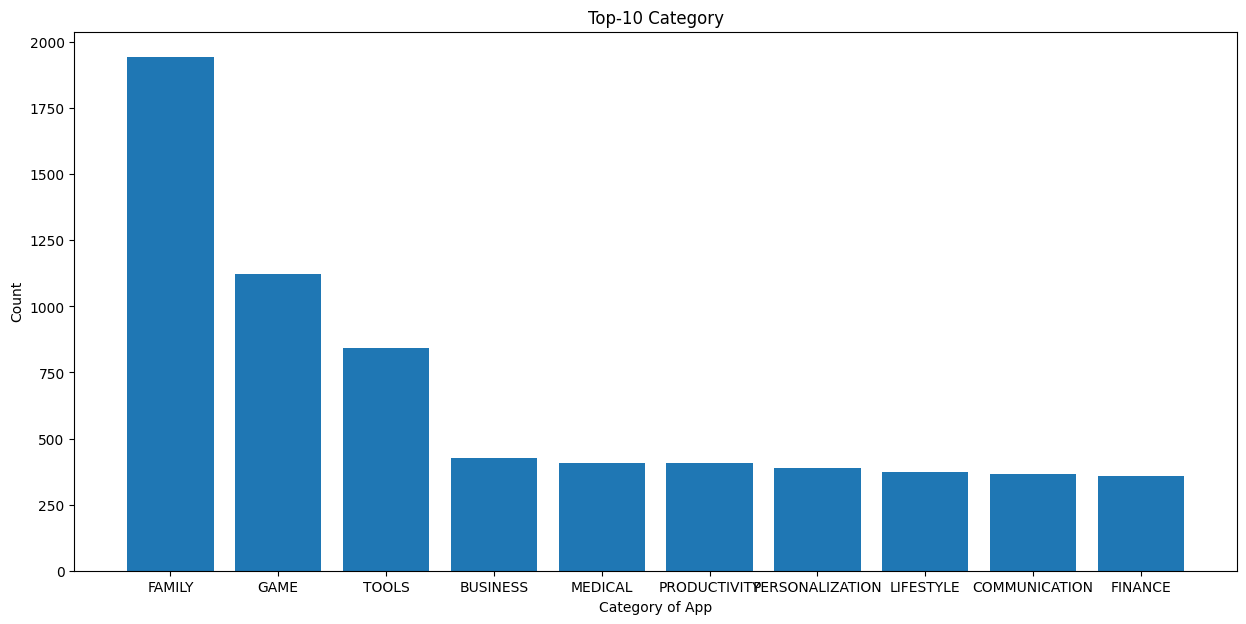

In [24]:
plt.figure(figsize=(15,7))
plt.bar(x=Category["Category"],height=Category["Count"])
plt.xlabel("Category of App")
plt.ylabel("Count")
plt.title("Top-10 Category")

In [25]:
#We will use label encoding on this data
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [26]:
df["Category"]=encoder.fit_transform(df.Category)

In [27]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,1,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up
1,1,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,1,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up
3,1,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,Varies with device,4.2 and up
4,1,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up


In [28]:
#converting the ratings in numeric
df.Rating=pd.to_numeric(df.Rating)

In [29]:
df.Rating.dtype

dtype('float64')

In [30]:
df.Size.value_counts(ascending=True)

371k                     1
840k                     1
186k                     1
319k                     1
683k                     1
                      ... 
14M                    182
13M                    186
12M                    186
11M                    188
Varies with device    1525
Name: Size, Length: 462, dtype: int64

Bookmark

In [31]:
def convert_size(size):
    if 'M' in size:
        x=size[:-1]
        x=float(x)*1000
        return(x)
    elif 'k'==size[:-1]:
        x=size[:-1]
        x=float(x)
        return(x)
    else:
        return None
df["Size"]=df["Size"].map(convert_size)

In [32]:
df.dtypes

Category            int64
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Current Ver        object
Android Ver        object
dtype: object

In [33]:
df["Size"].fillna(df["Size"].mean(),inplace=True)

In [34]:
df.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
dtype: int64

In [35]:
#df.Size=pd.to_numeric(df.Size)

In [36]:
#making the one that have less than 10 value_count as others before we do label encoding
def replace_values_below_threshold(df, column_name, threshold=10):
    value_counts = df[column_name].value_counts()
    values_to_replace = value_counts[value_counts < threshold].index.tolist()
    df[column_name] = df[column_name].replace(values_to_replace, "other")
    return df

In [37]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,1,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up
1,1,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,1,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up
3,1,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,Varies with device,4.2 and up
4,1,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up


In [38]:
df["Current Ver"].value_counts(ascending=True)

5.1.0 free               1
20180620                 1
1.0.0.8                  1
1.11.39                  1
5.17.2.009               1
                      ... 
2.0                    149
1.2                    177
1.1                    260
1.0                    802
Varies with device    1309
Name: Current Ver, Length: 2832, dtype: int64

In [39]:
df["Android Ver"].value_counts(ascending=True)

5.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
2.2 - 7.1.1              1
1.0 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
7.1 and up               3
8.0 and up               6
2.0.1 and up             7
3.1 and up              10
4.4W and up             11
1.5 and up              20
5.1 and up              22
2.0 and up              32
3.2 and up              36
7.0 and up              42
6.0 and up              58
1.6 and up             116
2.1 and up             133
4.3 and up             235
3.0 and up             237
2.2 and up             239
2.3.3 and up           279
4.2 and up             387
5.0 and up             546
2.3 and up             643
4.4 and up             894
Varies with device    1223
4.0 and up            1337
4.0.3 and up          1451
4.1 and up            2379
Name: Android Ver, dtype: int64

In [40]:
#Lets handle current version and Android version in the same way as Size as they have similar problem
df=replace_values_below_threshold(df,column_name="Current Ver")

In [41]:
df["Current Ver"]=encoder.fit_transform(df["Current Ver"])

In [42]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,1,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,4,4.0.3 and up
1,1,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,66,4.0.3 and up
2,1,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,37,4.0.3 and up
3,1,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,127,4.2 and up
4,1,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,19,4.4 and up


In [43]:
df["Current Ver"].nunique()

129

In [44]:
df=replace_values_below_threshold(df,column_name="Android Ver")

In [45]:
df["Android Ver"]=encoder.fit_transform(df["Android Ver"])

In [46]:
df['Android Ver'].nunique()

23

In [47]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,1,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,4,11
1,1,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,66,11
2,1,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,37,11
3,1,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,127,13
4,1,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,19,15


In [48]:
df.dtypes

Category            int64
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Current Ver         int64
Android Ver         int64
dtype: object

In [49]:
#Converting reviews as numeric in this ther are values ending with M meaning million
def convert_reviews_to_numeric(df):
    df["Reviews"] = np.where(df["Reviews"].str.endswith("M"), df["Reviews"].str.replace("M", "").astype(float) * 1000000, df["Reviews"])
    return df

df = convert_reviews_to_numeric(df)
df.head()


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,1,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,4,11
1,1,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,66,11
2,1,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,37,11
3,1,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,127,13
4,1,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,19,15


In [50]:
df.Reviews=pd.to_numeric(df.Reviews)

In [51]:
df.dtypes

Category            int64
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Current Ver         int64
Android Ver         int64
dtype: object

In [52]:
#Converting installs in number
df["Installs"] = df["Installs"].str.replace(",", "").str.replace("+", "")

In [53]:
df2=df["Installs"]=="Free"

In [54]:
df2.value_counts()

False    10356
True         1
Name: Installs, dtype: int64

In [55]:
#replacing that one free with zero
df["Installs"]=df["Installs"].str.replace("Free","0")

In [56]:
df.Installs=pd.to_numeric(df.Installs)

In [57]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,1,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,4,11
1,1,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,66,11
2,1,4.7,87510.0,8700.0,5000000,Free,0,Everyone,Art & Design,37,11
3,1,4.5,215644.0,25000.0,50000000,Free,0,Teen,Art & Design,127,13
4,1,4.3,967.0,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,19,15


In [61]:
#Removing impossible data as Installs is always greater than or equal to no of reviews
df[df.Reviews>df.Installs]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
2454,21,5.000000,4.0,25000.000000,1,Free,0,Everyone,Medical,128,11
4550,12,4.193338,4.0,64000.000000,1,Free,0,Everyone,Education,5,15
4663,19,4.800000,10249.0,22058.607327,10000,Paid,$2.49,Everyone,Lifestyle,127,21
5812,24,4.193338,2.0,22058.607327,1,Paid,$0.99,Everyone,Personalization,3,5
5917,15,5.000000,2.0,20000.000000,1,Paid,$1.49,Everyone,Arcade,10,5
6508,30,4.193338,11.0,2000.000000,10,Paid,$0.99,Everyone,Tools,4,11
6700,15,5.000000,7.0,19000.000000,5,Free,0,Everyone,Arcade,3,12
7402,15,5.000000,11.0,6100.000000,10,Free,0,Everyone,Arcade,1,5
8591,28,5.000000,20.0,4200.000000,10,Free,0,Teen,Social,3,10
9096,12,4.193338,14.0,47000.000000,10,Paid,$0.99,Everyone,Puzzle,32,5


In [62]:
df=df[df.Reviews<=df.Installs]

In [63]:
df.shape

(10345, 11)

In [64]:
genres=df["Genres"].value_counts().sort_values(ascending=False)[:10]
genres=genres.reset_index()
genres=genres.rename(mapper={"index":"Genres","Genres":"Counts"},axis="columns")
genres

,Genres,Counts
0,Tools,841
1,Entertainment,588
2,Education,526
3,Business,427
4,Medical,407
5,Productivity,407
6,Personalization,387
7,Lifestyle,371
8,Communication,366
9,Sports,364


Text(0.5, 1.0, 'Top 10 Genres')

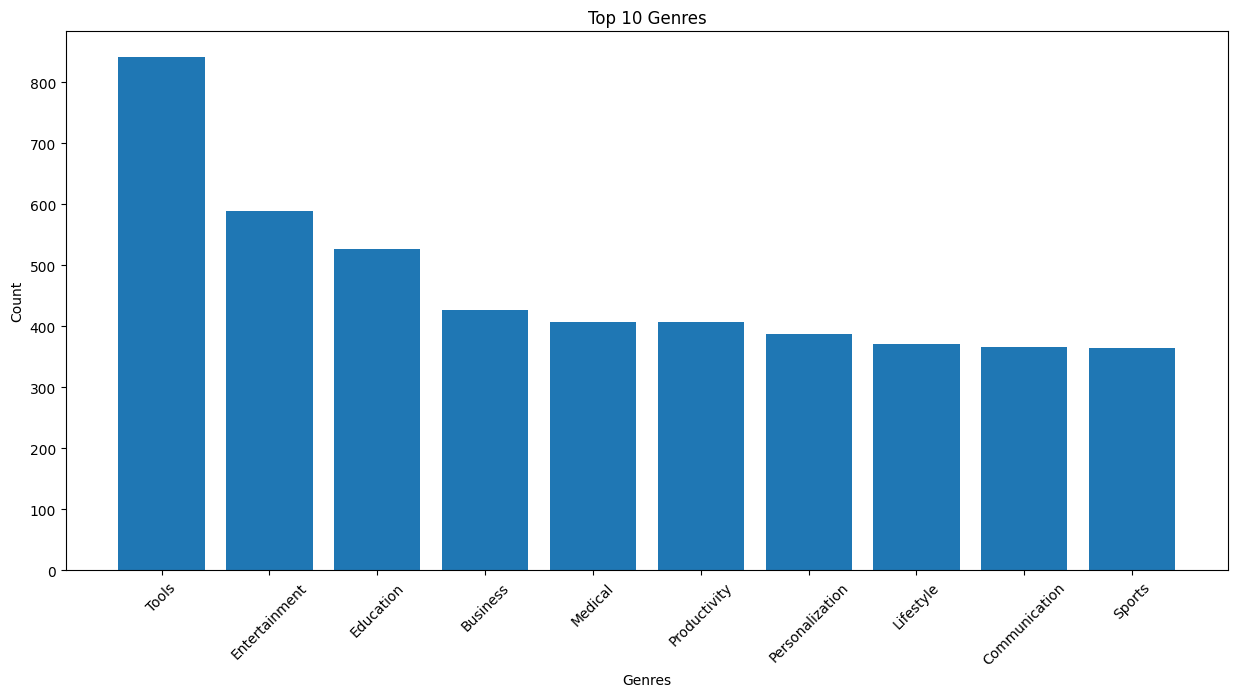

In [65]:
plt.figure(figsize=(15,7))
plt.bar(x=genres["Genres"],height=genres["Counts"])
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Top 10 Genres")

In [66]:
df.Genres.nunique()

119

In [67]:
df["Genres"].value_counts(ascending=True)

Strategy;Creativity                    1
Lifestyle;Pretend Play                 1
Travel & Local;Action & Adventure      1
Tools;Education                        1
Health & Fitness;Education             1
                                    ... 
Productivity                         407
Business                             427
Education                            526
Entertainment                        588
Tools                                841
Name: Genres, Length: 119, dtype: int64

In [68]:
#We will replace values less than 10 as others
df=replace_values_below_threshold(df,column_name="Genres")

In [69]:
df.Genres=encoder.fit_transform(df.Genres)

In [70]:
df.Genres.nunique()

63

In [71]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,1,4.1,159.0,19000.0,10000,Free,0,Everyone,6,4,11
1,1,3.9,967.0,14000.0,500000,Free,0,Everyone,62,66,11
2,1,4.7,87510.0,8700.0,5000000,Free,0,Everyone,6,37,11
3,1,4.5,215644.0,25000.0,50000000,Free,0,Teen,6,127,13
4,1,4.3,967.0,2800.0,100000,Free,0,Everyone,62,19,15


In [72]:
#Converting Price in number
df["Price"] = df["Price"].str.replace("$", "").str.replace("Everyone","0")

In [73]:
df["Price"]=pd.to_numeric(df.Price)

In [74]:
df.Type.value_counts()

Free    9586
Paid     759
Name: Type, dtype: int64

In [75]:
#Handle the 0 in the column and making it free
df['Type'] = df['Type'].replace('0', 'Free')

In [76]:
fr_pd=df.Type.value_counts()
fr_pd

Free    9586
Paid     759
Name: Type, dtype: int64

([<matplotlib.patches.Wedge at 0x7f4d44a4a200>,
 [Text(-0.25130524012702443, -1.0709088085755476, 'Free'),
  Text(0.251305265193454, 1.0709088026933236, 'Paid')])

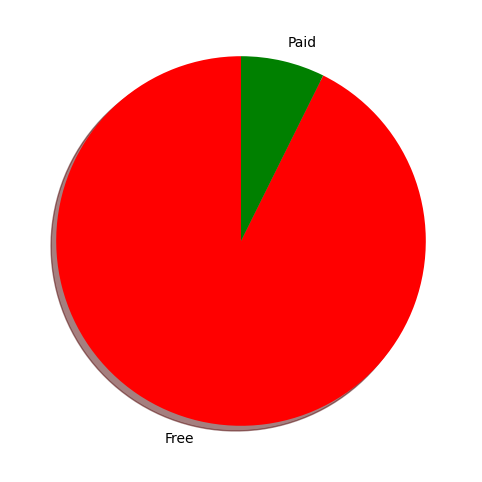

In [77]:
plt.figure(figsize=(12,6),)
plt.pie(fr_pd,labels=fr_pd.index,shadow=True,colors=["red","green"],startangle=90)

This is a very imbalanced dataset therefore we need to balance it

In [78]:
content_rating=df["Content Rating"].value_counts()
content_rating=content_rating.reset_index()
content_rating=content_rating.rename(mapper={"index":"Content_Rating","Content Rating":"Count"},axis=1)
content_rating

,Content_Rating,Count
0,Everyone,8372
1,Teen,1145
2,Mature 17+,447
3,Everyone 10+,376
4,Adults only 18+,3
5,Unrated,2


Text(0.5, 1.0, 'Top Content_Rating')

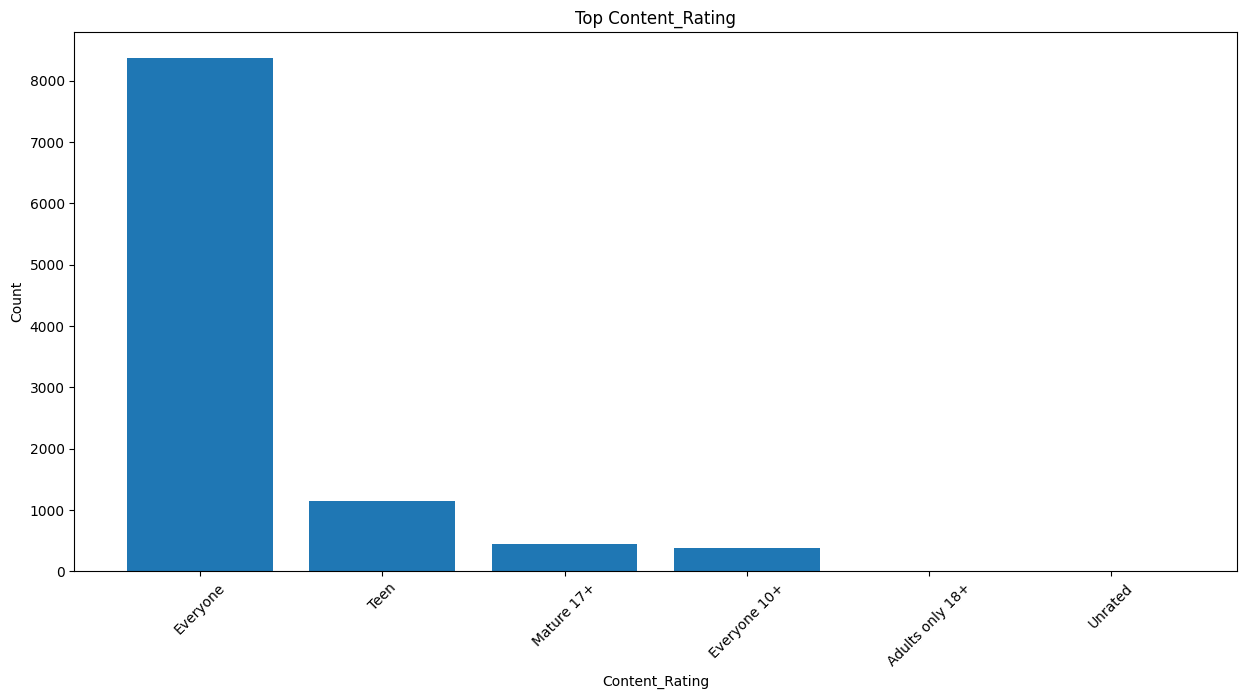

In [79]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
plt.bar(x=content_rating["Content_Rating"],height=content_rating["Count"])
plt.xlabel("Content_Rating")
plt.ylabel("Count")
plt.title("Top Content_Rating")

In [80]:
#Label Encodeing Type and Content Rating
df.Type=encoder.fit_transform(df.Type)
df["Content Rating"]=encoder.fit_transform(df["Content Rating"])

In [81]:
df.shape

(10345, 11)

Text(0.5, 1.0, 'Distribution of Rating')

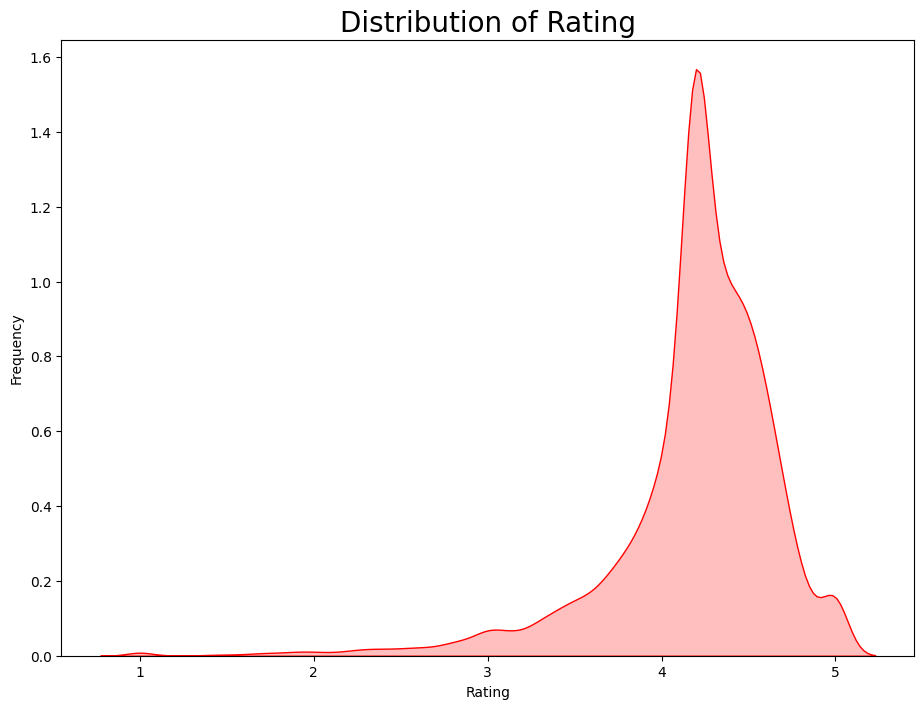

In [82]:
from pylab import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# rating distibution
rcParams['figure.figsize'] = 11,8
g = sns.kdeplot(df.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

In [83]:
#Remiving impossible rating ie greater than 5 and less than 1
df = df[(df['Rating'] <= 5) & (df['Rating'] >= 1)]

In [84]:
df.shape

(10345, 11)

In [85]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,1,4.1,159.0,19000.0,10000,0,0.0,1,6,4,11
1,1,3.9,967.0,14000.0,500000,0,0.0,1,62,66,11
2,1,4.7,87510.0,8700.0,5000000,0,0.0,1,6,37,11
3,1,4.5,215644.0,25000.0,50000000,0,0.0,4,6,127,13
4,1,4.3,967.0,2800.0,100000,0,0.0,1,62,19,15


In [86]:
df.dtypes

Category            int64
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type                int64
Price             float64
Content Rating      int64
Genres              int64
Current Ver         int64
Android Ver         int64
dtype: object

In [87]:
# Standardize columns with non-categorical data
# also we don't standardize our target vraiable
col_to_scale=["Reviews","Size","Installs","Price"]

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
df[col_to_scale]=scalar.fit_transform(df[col_to_scale])

In [88]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,1,4.1,-0.150552,-0.149291,-0.176433,0,-0.063315,1,6,4,11
1,1,3.9,-0.150252,-0.393379,-0.170330,0,-0.063315,1,62,66,11
2,1,4.7,-0.118178,-0.652111,-0.114276,0,-0.063315,1,6,37,11
3,1,4.5,-0.070689,0.143614,0.446257,0,-0.063315,4,6,127,13
4,1,4.3,-0.150252,-0.940135,-0.175312,0,-0.063315,1,62,19,15


In [89]:
X=df.drop("Rating",axis="columns")
Y=df.Rating

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, Y ,test_size=0.25)

In [91]:
X_train.shape

(7758, 10)

In [92]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [93]:
model=Sequential()

model.add(Dense(units=50,activation="relu",input_shape=(10,)))
model.add(Dropout(0.2))

model.add(Dense(units=60,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(units=40,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=12,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [94]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 60)                3060      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 40)                2440      
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                4

In [95]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
243/243 [==============================] - 7s 4ms/step - loss: 77.3364
Epoch 2/50
243/243 [==============================] - 1s 3ms/step - loss: 13.2913
Epoch 3/50
243/243 [==============================] - 1s 4ms/step - loss: 9.5892
Epoch 4/50
243/243 [==============================] - 1s 3ms/step - loss: 7.7288
Epoch 5/50
243/243 [==============================] - 1s 3ms/step - loss: 6.3124
Epoch 6/50
243/243 [==============================] - 1s 3ms/step - loss: 5.1901
Epoch 7/50
243/243 [==============================] - 1s 3ms/step - loss: 4.2379
Epoch 8/50
243/243 [==============================] - 1s 3ms/step - loss: 3.5418
Epoch 9/50
243/243 [==============================] - 1s 4ms/step - loss: 2.9652
Epoch 10/50
243/243 [==============================] - 1s 5ms/step - loss: 2.3620
Epoch 11/50
243/243 [==============================] - 1s 5ms/step - loss: 1.9867
Epoch 12/50
243/243 [==============================] - 1s 3ms/step - loss: 1.6166
Epoch 13/50
243/243 [==

In [96]:
y_pred=model.predict(X_test)

81/81 [==============================] - 0s 1ms/step


In [97]:
y_pred

array([[4.1843657],
       [4.183866 ],
       [4.184622 ],
       ...,
       [4.184427 ],
       [4.1838484],
       [4.183993 ]], dtype=float32)

In [98]:
model.evaluate(X_test,y_test)

81/81 [==============================] - 0s 2ms/step - loss: 0.2394


0.2394452840089798

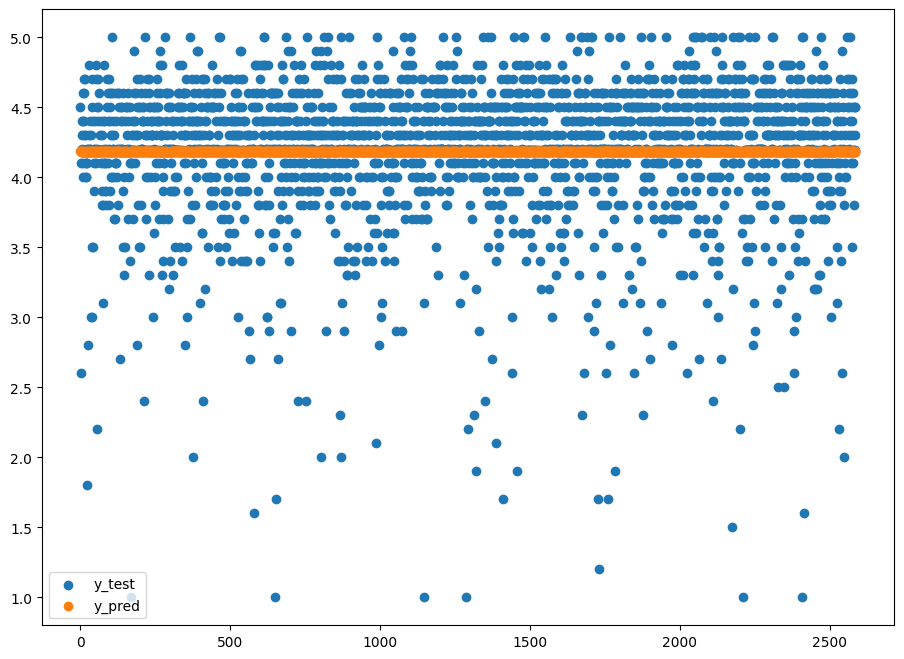

In [99]:
plt.scatter(np.arange(len(y_test)), y_test, label='y_test')
plt.scatter(np.arange(len(y_pred)), y_pred, label='y_pred')
plt.legend()
plt.show()

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [101]:
# Train Random Forest Regressor
randomf = RandomForestRegressor(n_estimators=300)
randomf.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, randomf.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, randomf.predict(X_test)))

Mean squared Error for Training Set: 0.028079705021550702
Mean squared Error for Test Set: 0.2174978935760508


In [102]:
#Grid search CV for model selection and hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [103]:
param_grid = {
    'Random Forest': {
        'model': RandomForestRegressor(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Bagging Regressor': {
        'model': BaggingRegressor(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_samples': [0.5, 0.8, 1.0]
        }
    },
    'KNN Regressor': {
        'model': KNeighborsRegressor(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Linear Regression': {
        'model': LinearRegression(),
        'param_grid': {
            'fit_intercept': [True, False]
        }
    }
}

In [104]:
for model_name, config in param_grid.items():
    grid_search = GridSearchCV(config['model'], config['param_grid'], cv=5)
    grid_search.fit(X_train, y_train)
    print(model_name)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # Evaluate the model on the test set
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test, y_test)
    print("Test Score:", test_score)
    print()

Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.14563158313757305
Test Score: 0.08914174058290569

Bagging Regressor
Best Parameters: {'max_samples': 0.5, 'n_estimators': 200}
Best Score: 0.14830180829067866
Test Score: 0.10718787271458052

KNN Regressor
Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best Score: -0.04402322200882876
Test Score: -0.04071692686984085

Linear Regression
Best Parameters: {'fit_intercept': True}
Best Score: 0.01621658077581036
Test Score: 0.008268599114632957



In [105]:
final_model=LinearRegression(fit_intercept=True)
final_model.fit(X_train,y_train)

LinearRegression()

In [106]:
final_model.score(X_test,y_test)

0.008268599114632957

In [107]:
print('Mean squared Error for Training Set:', mean_squared_error(y_train, randomf.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, randomf.predict(X_test)))

Mean squared Error for Training Set: 0.028079705021550702
Mean squared Error for Test Set: 0.2174978935760508


In [108]:
y_pred=final_model.predict(X_test)

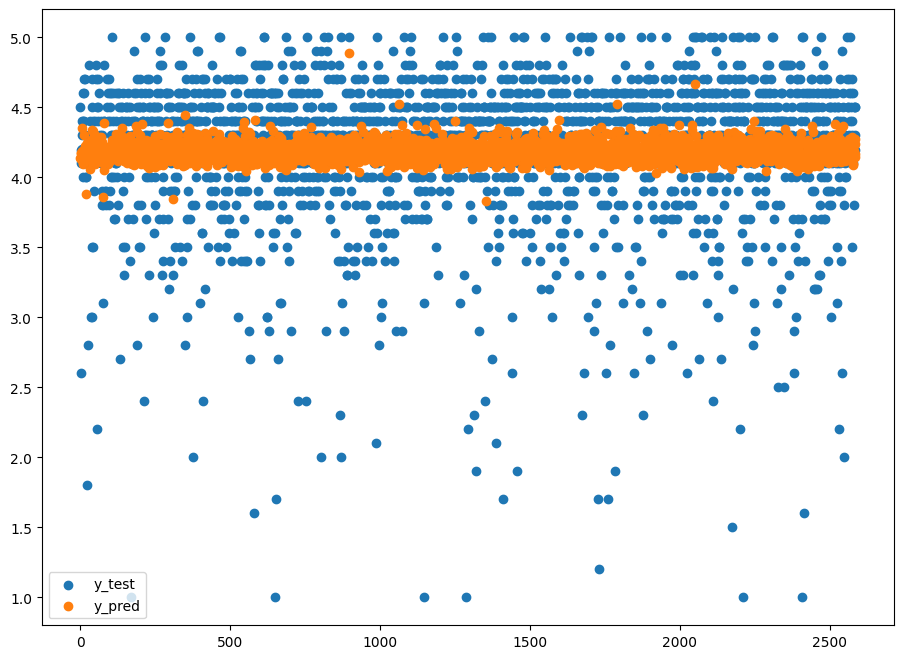

In [109]:
plt.scatter(np.arange(len(y_test)), y_test, label='y_test')
plt.scatter(np.arange(len(y_pred)), y_pred, label='y_pred')
plt.legend()
plt.show()